# Bike Share Project
### By (Mahmoud Khaled)

## Investigation Overview

The Main Goal of this analysis is to Obtain Consumer Behavior of this service, in addition to the difference between registered customers & unregistered customer 

## Dataset Overview

The intial dataset contains +17K records for Bike rides with below 17 features: 'instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'

After Cleaning Data, my main featuers will be:
- Which season is more using to bike?
- Which weekday is more used to biking?
- Is the registered increase during 2 years (2011, 2012) or not?

## Data Gathering


In [2]:
#Import Imp. Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Load hourly data 
hourly_data = pd.read_csv('D:\Courses\data science\Data analysis Advanced Track\project\Bike-Sharing-Dataset\hour.csv')
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Assessing
- Start checking your Data ( head, tail, info, describe, ....)

In [4]:
#print some genertic stastics about the data
print(f'Number of rows and columns: {hourly_data.shape}')
print(f'Number of missing values: {hourly_data.isna().sum().sum()}')

Number of rows and columns: (17379, 17)
Number of missing values: 0


In [5]:
#Descripte some of statistical data 
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


## Assessment Documentation
- From the assessment output, we have 17379 records and 17 columns with no missing values but we need to replace some values of this columns ('season', 'mnth', 'weekday', 'weathersit', 'yr') to be readable 

## Data Cleaning


In [6]:
#create a copy from original data
preprocessed_data = hourly_data.copy()
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#replace values in Temporal columns with readable values
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#season
preprocessed_data['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'}, inplace = True)
preprocessed_data['season'].unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [8]:
#year
preprocessed_data['yr'].replace({0: 2011, 1:2012}, inplace=True)

#month
preprocessed_data['mnth'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace= True)

#weekday
preprocessed_data['weekday'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}, inplace=True)

In [9]:
#replace values in Weather columns with readable values
#weather_sit
preprocessed_data['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Light_snow_rain', 3:'Heavy_snow_rain'}, inplace = True)

In [10]:
#transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum'] * 100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] * 67

In [11]:
#check a sample of data after replacement 
cols = ['season','yr', 'mnth', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,mnth,weekday,weathersit,hum,windspeed
5792,summer,2011,September,Saturday,Clear,74.0,8.9981
7823,fall,2011,November,Sunday,Clear,43.0,31.0009
15426,fall,2012,October,Tuesday,Cloudy,77.0,6.0032
15028,fall,2012,September,Sunday,Clear,51.0,22.0028
12290,spring,2012,June,Friday,Cloudy,89.0,12.9980
3262,spring,2011,May,Friday,Clear,64.0,7.0015
10763,spring,2012,March,Thursday,Clear,42.0,23.9994
12384,spring,2012,June,Tuesday,Heavy_snow_rain,82.0,11.0014
6051,summer,2011,September,Wednesday,Clear,52.0,19.0012
948,winter,2011,February,Saturday,Clear,80.0,0.0000


In [12]:
##assert that total number of rides is equal to the sum of registered and casual
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

## Analysis Part

### Visualization_1

C:\Users\gg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


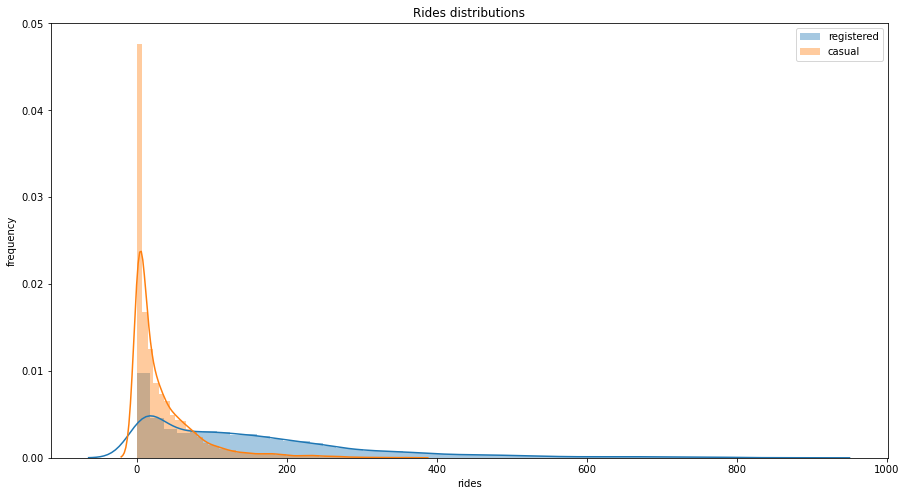

In [13]:
#plot distrebution of registered VS casual
plt.figure(figsize=(15.0,8.0))
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.xlabel('rides')
plt.ylabel('frequency')
plt.legend()
plt.title('Rides distributions')
plt.savefig('D:\\Courses\\data science\\Data analysis Advanced Track\\project\\Bike-Sharing-Dataset\\project\\rides_distributions.png',format='png')

From Visualization_1, we can easily see that registered users perform way more rides than casual ones. Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered. Finally, every entry in the data has quite a large number of rides (that is, higher than 800).

### Visualiztion_2

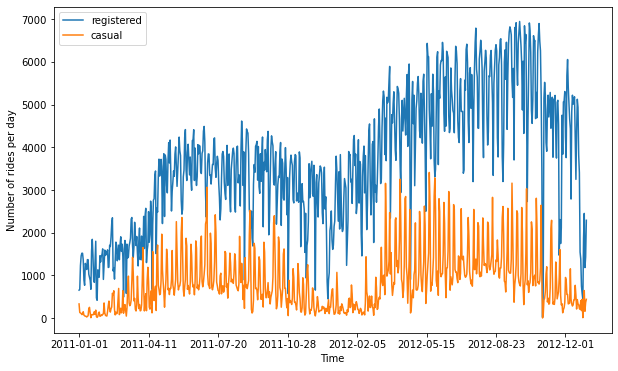

In [14]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize = (10, 6))
ax.set_xlabel('Time')
ax.set_ylabel('Number of rides per day')
plt.savefig('D:\\Courses\\data science\\Data analysis Advanced Track\\project\\Bike-Sharing-Dataset\\project\\rides_per_day.png',format='png')

As you can see from the preceding figure, the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore, we can observe that during winter, the overall number of rides decreases and increase during spring and summer season

### visualization_3

In [15]:
#Create new dataframe with necessary for plotting columns, and obtain number of rides per day, by grouping over each day
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

In [16]:
#define window for computing the rolling mean and standard deviation
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

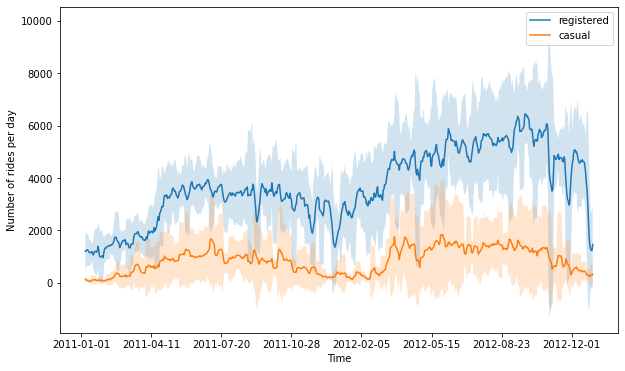

In [17]:
#Create a plot of the series, where we first plot the series of rolling means, then we color the zone between 
#the series of rolling means +- 2 rolling standard deviations
ax = rolling_means.plot(figsize = (10, 6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'], rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'], rolling_means['casual']-2*rolling_deviations['casual'], alpha = 0.2)
ax.set_xlabel('Time')
ax.set_ylabel('Number of rides per day')
plt.savefig('D:\\Courses\\data science\\Data analysis Advanced Track\\project\\Bike-Sharing-Dataset\\project\\rides_per_day_2.png',format='png')

In this visualization_3 we smooth out the curves is to take the rolling mean and standard deviation of the two time series and plot those insteade

### Visualization_4

In [18]:
#plot number of rides per hour per weekday 
#select data
plot_data = preprocessed_data[['hr','weekday', 'registered', 'casual']]

#transform the data into a format, in number of entries are computed as count, for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars= ['hr', 'weekday'], var_name='type', value_name='count')
plot_data

,hr,weekday,type,count
0,0,Saturday,registered,13
1,1,Saturday,registered,32
2,2,Saturday,registered,27
3,3,Saturday,registered,10
4,4,Saturday,registered,1
...,...,...,...,...
34753,19,Monday,casual,11
34754,20,Monday,casual,8
34755,21,Monday,casual,7
34756,22,Monday,casual,13


C:\Users\gg\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


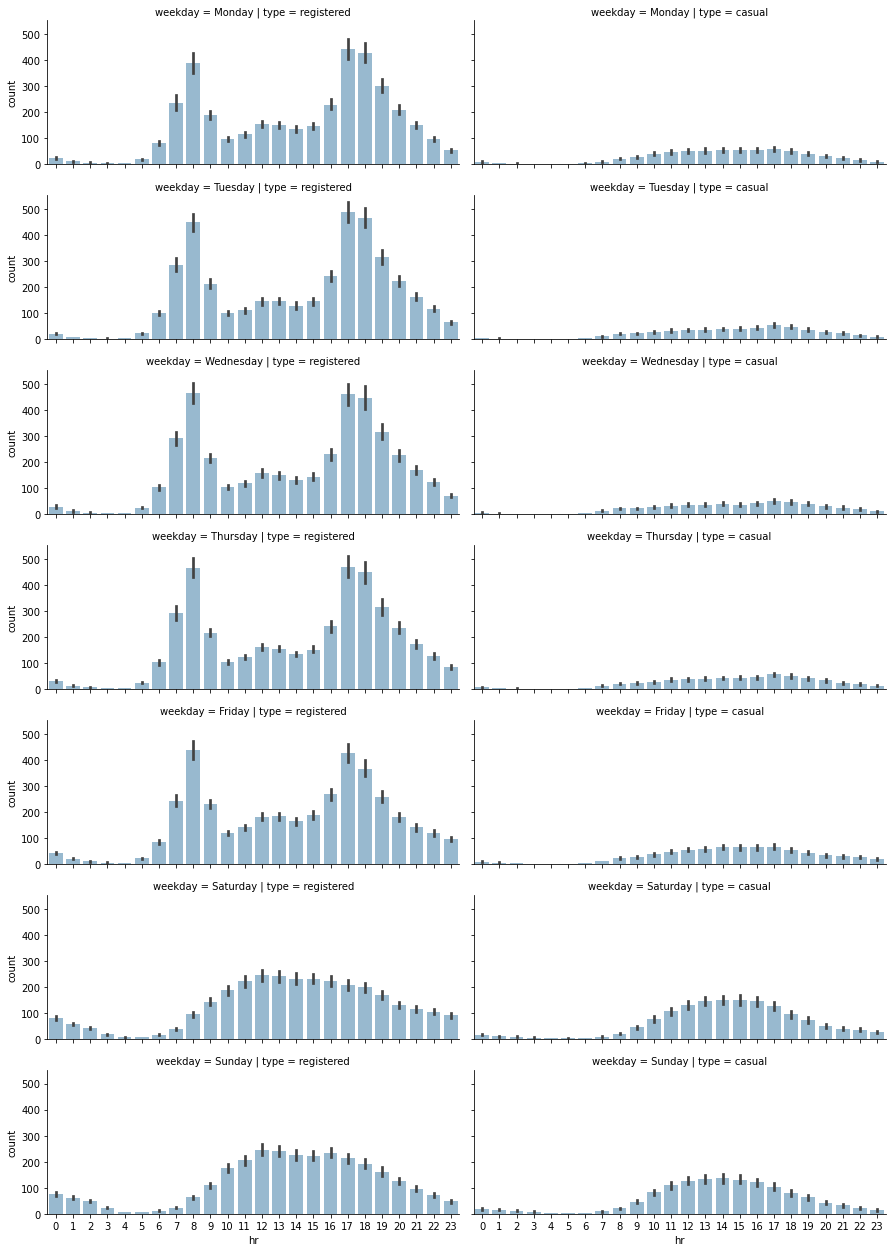

In [19]:
#create FacetGrid object, in which a grid plot is produced. As columns, we have the various days of the week, as rows, the different types (registered and casual)
g = sns.FacetGrid(plot_data, col="type", row="weekday", height= 2.5, aspect=2.5, row_order=['Monday', 'Tuesday','Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
g.map(sns.barplot, "hr", "count", alpha = 0.5)
plt.savefig('D:\\Courses\\data science\\Data analysis Advanced Track\\project\\Bike-Sharing-Dataset\\project\\rides_per_day_3.png',format='png')

During the weekend, we can see that ride distributions change for both casual and
registered users. Still, registered rides are more frequent than casual ones, but both
the distributions have the same shape, almost uniformly distributed between the
time interval of 11 AM to 6 PM.

### Visualization_5

C:\Users\gg\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


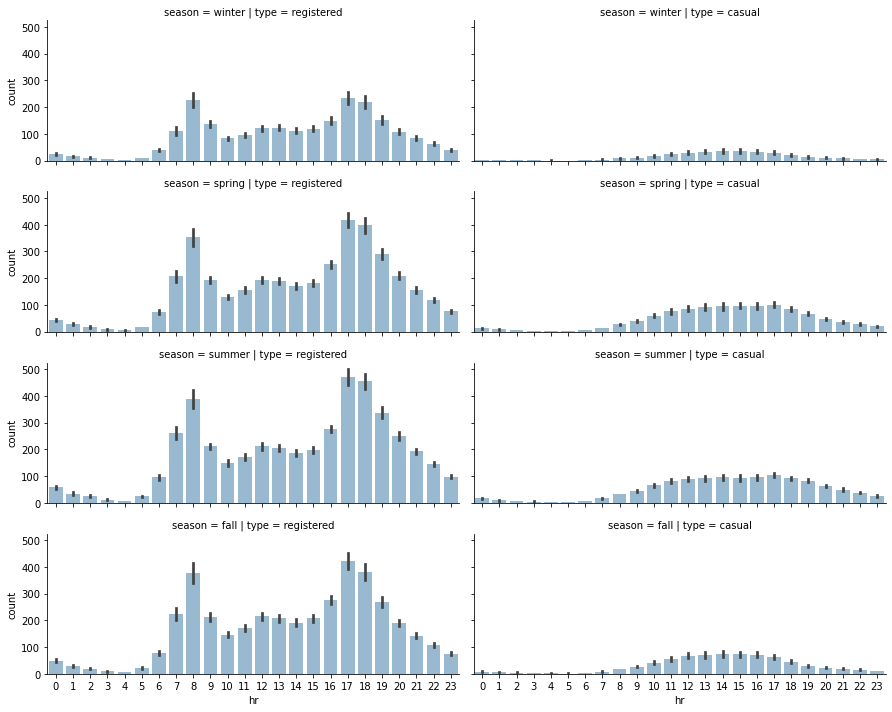

In [20]:
#hr per season
plot_data = preprocessed_data[['hr','season','registered','casual']]
plot_data = plot_data.melt(id_vars=['hr','season'], var_name='type', value_name='count')
g = sns.FacetGrid(plot_data, row = 'season', col = 'type', height=2.5, aspect= 2.5, row_order=['winter','spring','summer', 'fall'])
g.map(sns.barplot, 'hr', 'count', alpha = 0.5)
plt.savefig('D:\\Courses\\data science\\Data analysis Advanced Track\\project\\Bike-Sharing-Dataset\\project\\hr_per_season.png',format='png')

As can be seen in the plot, while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides (registered and casual) during winter.

### Visualization_6

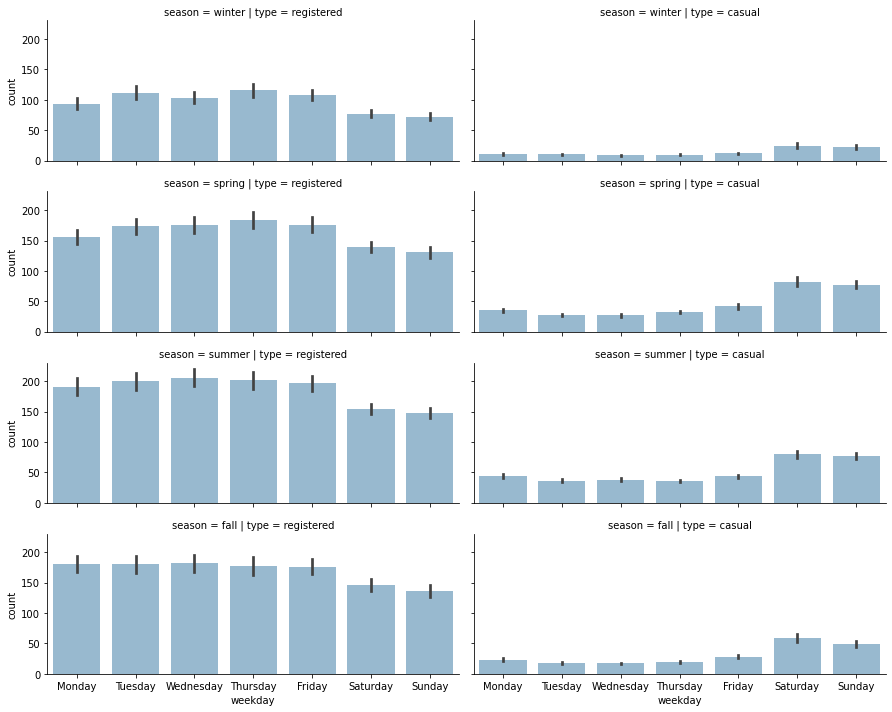

In [21]:
#weekday per season
plot_data = preprocessed_data[['weekday','season','registered','casual']]
plot_data = plot_data.melt(id_vars=['weekday','season'], var_name='type', value_name='count')
g = sns.FacetGrid(plot_data, col = 'type', row = 'season', height=2.5, aspect=2.5, row_order=['winter','spring','summer', 'fall'])
g.map(sns.barplot, 'weekday', 'count', alpha = 0.5,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
plt.savefig('D:\\Courses\\data science\\Data analysis Advanced Track\\project\\Bike-Sharing-Dataset\\project\\weekday_per_season.png',format='png')

as we can see in visualization_6 There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases.

## Analysis Conclusion
- Most of the usage of bike-sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5).
-  using bikes during spring and summer seasons more than fall and winter season